<a href="https://colab.research.google.com/github/anandopt/ML_NN_COLAB/blob/master/Mahalonobis_distance_for_multivariate_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance, MinCovDet

n_samples = 125
n_outliers = 25
n_features = 2

#####Get data
get_cov=np.eye(n_features)
get_cov[0,0] = 2.
X=np.dot(np.random.randn(n_samples, n_features), get_cov)
X

array([[-0.9731752 , -0.61060803],
       [ 0.7236624 , -0.97742294],
       [ 2.40523871, -1.45531194],
       [-4.02292184, -0.19600265],
       [ 0.51869405,  0.17531356],
       [ 0.90617423,  0.33976389],
       [ 3.23480664,  0.05992092],
       [ 2.43192127,  1.02215107],
       [-0.78568115,  2.030071  ],
       [-2.56931324, -0.16957234],
       [ 0.20689817, -0.32109015],
       [ 3.99199244, -0.662596  ],
       [ 0.53089036,  1.05251913],
       [-1.54541587, -0.32988146],
       [ 2.38940377,  0.67448469],
       [ 4.95505379,  1.37151919],
       [-2.81221833, -0.72777379],
       [-0.81322063,  0.8750118 ],
       [-0.20192845, -0.62943486],
       [-0.73771865, -2.11670709],
       [-4.01716882,  0.92446502],
       [ 2.75393251, -0.73275055],
       [-3.46926193,  1.52745218],
       [-1.0206397 , -0.86857884],
       [ 0.37885661,  1.65484155],
       [-0.84705791, -0.28174893],
       [ 0.19102486,  0.0302302 ],
       [ 2.32276877,  1.12790803],
       [ 1.60801019,

In [3]:
outlier_cov = np.eye(n_features)
outlier_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outlier_cov)
X

array([[-9.73175199e-01, -6.10608029e-01],
       [ 7.23662399e-01, -9.77422944e-01],
       [ 2.40523871e+00, -1.45531194e+00],
       [-4.02292184e+00, -1.96002651e-01],
       [ 5.18694050e-01,  1.75313556e-01],
       [ 9.06174229e-01,  3.39763891e-01],
       [ 3.23480664e+00,  5.99209217e-02],
       [ 2.43192127e+00,  1.02215107e+00],
       [-7.85681145e-01,  2.03007100e+00],
       [-2.56931324e+00, -1.69572344e-01],
       [ 2.06898174e-01, -3.21090147e-01],
       [ 3.99199244e+00, -6.62595996e-01],
       [ 5.30890364e-01,  1.05251913e+00],
       [-1.54541587e+00, -3.29881460e-01],
       [ 2.38940377e+00,  6.74484694e-01],
       [ 4.95505379e+00,  1.37151919e+00],
       [-2.81221833e+00, -7.27773788e-01],
       [-8.13220630e-01,  8.75011803e-01],
       [-2.01928450e-01, -6.29434864e-01],
       [-7.37718649e-01, -2.11670709e+00],
       [-4.01716882e+00,  9.24465024e-01],
       [ 2.75393251e+00, -7.32750552e-01],
       [-3.46926193e+00,  1.52745218e+00],
       [-1.

In [4]:
robust_cov = MinCovDet().fit(X)
robust_cov

MinCovDet(assume_centered=False, random_state=None, store_precision=True,
     support_fraction=None)

In [5]:
emp_cov = EmpiricalCovariance().fit(X)
emp_cov

EmpiricalCovariance(assume_centered=False, store_precision=True)

In [6]:
  X[:,0][-n_outliers:]

array([ 1.52297845e+00,  5.65698174e-01,  1.74198378e+00,  9.15032203e-01,
       -3.03728133e+00, -2.00807548e-01, -1.68192263e-01, -1.60695029e-03,
        2.05726895e+00, -3.49793034e-01,  6.65357863e-01, -3.42417776e-01,
        1.76322765e+00,  2.68990139e-01, -1.38957594e+00, -3.73024237e-01,
        4.43039966e-01,  2.46224279e-01,  1.17267508e-01, -1.33497694e+00,
        6.54746639e-01,  6.94945736e-01,  4.83451484e-01,  8.23086711e-01,
        1.69970684e+00])

Text(0.5, 1.0, 'Mahalanobis distances of a contaminated data set:')

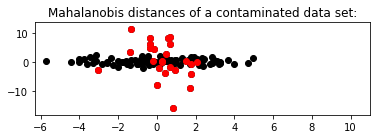

In [7]:
#####Visualization
fig = plt.figure()
plt.subplots_adjust(hspace=-0.1, wspace=0.4, top=0.95, bottom=0.05)

#### Show dataset
subfig1 = plt.subplot(3,1,1)
inlier_plot=subfig1.scatter(X[:,0], X[:,1], color='black', label='inlier')
outlier_plot=subfig1.scatter(X[:,0][-n_outliers:], X[:,1][-n_outliers:], color='red', label='outlier')
# subfig1.get_xlim()[0]
subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
subfig1.set_title("Mahalanobis distances of a contaminated data set:")
# plt.show()

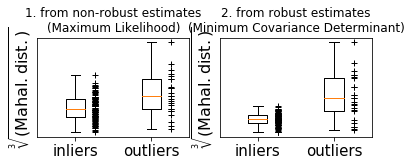

In [9]:
# Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]

mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                  cmap=plt.cm.PuBu_r,
                                  linestyles='dashed')

mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
                                 cmap=plt.cm.YlOrBr_r, linestyles='dotted')

subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
                inlier_plot, outlier_plot],
               ['MLE dist', 'robust dist', 'inliers', 'outliers'],
               loc="upper right", borderaxespad=0)
plt.xticks(())
plt.yticks(())


# Plot the scores for each point
emp_mahal = emp_cov.mahalanobis(X - np.mean(X, 0)) ** (0.33)
subfig2 = plt.subplot(2, 2, 3)
subfig2.boxplot([emp_mahal[:-n_outliers], emp_mahal[-n_outliers:]], widths=.25)
subfig2.plot(np.full(n_samples - n_outliers, 1.26),
             emp_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig2.plot(np.full(n_outliers, 2.26),
             emp_mahal[-n_outliers:], '+k', markeredgewidth=1)
subfig2.axes.set_xticklabels(('inliers', 'outliers'), size=15)
subfig2.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
subfig2.set_title("1. from non-robust estimates\n(Maximum Likelihood)")
plt.yticks(())

robust_mahal = robust_cov.mahalanobis(X - robust_cov.location_) ** (0.33)
subfig3 = plt.subplot(2, 2, 4)
subfig3.boxplot([robust_mahal[:-n_outliers], robust_mahal[-n_outliers:]],
                widths=.25)
subfig3.plot(np.full(n_samples - n_outliers, 1.26),
             robust_mahal[:-n_outliers], '+k', markeredgewidth=1)
subfig3.plot(np.full(n_outliers, 2.26),
             robust_mahal[-n_outliers:], '+k', markeredgewidth=1)
subfig3.axes.set_xticklabels(('inliers', 'outliers'), size=15)
subfig3.set_ylabel(r"$\sqrt[3]{\rm{(Mahal. dist.)}}$", size=16)
subfig3.set_title("2. from robust estimates\n(Minimum Covariance Determinant)")
plt.yticks(())

plt.show()